# IMDB Data Storytelling Project

IMDb is an incredible dataset. Started by a Usenet group and maintained to this day mostly by volunteer submissions, it contains information about a staggering number of motion pictures, including feature films, TV shows, even video games. And better yet, they offer much of their data in the form of .tsv files! Looking at what data they offered up, I became interested in IMDb user rating behavior.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

# Loading Budget/Box Office Data

In [105]:
df_movies_top = pd.read_csv('data/df_movies_top.csv')
box_office = pd.read_csv('data/Box Office Data - Sheet1 (1).csv', 
                         names=['Index','Release_Date','Movie','Production_Budget',
                                'Domestic_Gross','Worldwide_Gross'],
                         index_col='Index')

In [106]:
box_office.shape

(5876, 5)

In [107]:
box_office = box_office.drop(np.nan)

In [108]:
box_office['Release_dt'] = pd.to_datetime(box_office['Release_Date'], errors='coerce', format='%b %d, %Y')

box_office['Release_dt_isna'] = box_office['Release_dt'].isna()

box_office = box_office[box_office['Release_dt_isna'] == 0]

box_office['Release_dt'].isna().sum()

0

In [109]:
box_office.sample(10)

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna
Index,,,,,,,
"2,812","Nov 26, 2003",Bad Santa,"$18,000,000","$60,060,328","$77,147,031",2003-11-26,False
"5,287","Jan 23, 1943",Casablanca,"$1,039,000","$10,462,500","$10,498,348",1943-01-23,False
"2,551","Mar 31, 2010",The Last Song,"$20,000,000","$62,950,384","$92,678,948",2010-03-31,False
"2,955","Oct 21, 1977",Damnation Alley,"$17,000,000",$0,$0,1977-10-21,False
747,"Nov 1, 2002",I Spy,"$70,000,000","$33,561,137","$60,279,822",2002-11-01,False
"2,615","Jun 15, 2007",Nancy Drew,"$20,000,000","$25,584,685","$30,703,845",2007-06-15,False
"1,009","Oct 11, 2013",Captain Phillips,"$55,000,000","$107,136,417","$220,648,184",2013-10-11,False
"1,549","Apr 6, 2001",Just Visiting,"$40,000,000","$4,777,007","$16,172,200",2001-04-06,False
256,"Mar 20, 2014",Rio 2,"$130,000,000","$131,538,435","$492,846,291",2014-03-20,False


In [110]:
box_office['Release_Year'] = box_office['Release_dt'].dt.year

box_office['Release_Year_str'] = box_office['Release_Year'].apply(str)

box_office['Movie_merger'] = box_office['Movie'].str.lower() + ' ' + box_office['Release_Year_str']

In [111]:
box_office.head()

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str,Movie_merger
Index,,,,,,,,,,
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,False,2011,2011,pirates of the caribbean: on stranger tides 2011
2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000",2019-04-23,False,2019,2019,avengers: endgame 2019
3,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-04-22,False,2015,2015,avengers: age of ultron 2015
4,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-13,False,2017,2017,star wars ep. viii: the last jedi 2017
5,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-16,False,2015,2015,star wars ep. vii: the force awakens 2015


In [112]:
box_office.shape

(5708, 10)

In [113]:
df_movies_top['startYear_str'] = df_movies_top['startYear'].apply(str)

In [114]:
df_movies_top['Movie_merger'] = df_movies_top['primaryTitle'].str.lower() + ' ' + df_movies_top['startYear_str']

In [115]:
df_movies_top.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,1,0,0,0,1,0,0,0,1897,the corbett-fitzsimmons fight 1897
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,0,0,0,0,0,0,0,0,1906,the story of the kelly gang 1906
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,0,0,0,0,0,0,0,0,1912,cleopatra 1912
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,0,0,0,0,0,0,0,0,1911,dante's inferno 1911
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,0,0,0,0,0,0,0,0,1912,"from the manger to the cross; or, jesus of naz..."


In [116]:
df_movies_top.shape

(59386, 40)

In [117]:
# Looks like this technique will work for most of my titles.
# Gotta remember, worst case scenario, I just have to manually match the titles
# in the original .csv for box_office

df_movies_top[df_movies_top['primaryTitle'].str.contains('on stranger tides', case=False)]

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
38544,38544,tt1298650,movie,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,455834,...,0,0,0,0,0,0,0,0,2011,pirates of the caribbean: on stranger tides 2011


In [118]:
merged = pd.merge(df_movies_top, box_office, how='left')

In [119]:
merged.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,Movie_merger,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,the corbett-fitzsimmons fight 1897,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,the story of the kelly gang 1906,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,cleopatra 1912,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,dante's inferno 1911,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,"from the manger to the cross; or, jesus of naz...",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [120]:
# Remove missing box office data
gross_not_nan = merged['Domestic_Gross'].isna()-1

box_office = merged[(merged['Domestic_Gross'] != '$0') & gross_not_nan]

In [121]:
# Select desired columns
box_office = box_office[['primaryTitle', 'averageRating',
       'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Production_Budget',
       'Worldwide_Gross', 'Release_dt']]

In [122]:
# Convert budget/box office info to numeric
box_office['Production_Budget_Number'] = pd.to_numeric(box_office['Production_Budget'].apply(lambda x: x.strip('$')).str.replace(',',''))
box_office['Worldwide_Gross_Number'] = pd.to_numeric(box_office['Worldwide_Gross'].apply(lambda x: x.strip('$')).str.replace(',',''))

In [123]:
# Remove duplicate of Waltz With Bashir
box_office['duplicated'] = box_office.duplicated(subset=['primaryTitle', 'Release_dt', 'runtimeNumber'], keep='first')
box_office = box_office[box_office['duplicated'] == 0]

In [124]:
# Consider including only movies released since 1980?
# Let's just agree now that inflation is a problem here, and hope that excluding older movies mitigates the problem somewhat
box_office = box_office[box_office['Release_dt'].dt.year >= 1980]

In [125]:
# Fix last few duplicate columns
box_office = box_office.drop(columns=['Production_Budget', 'Worldwide_Gross', 'duplicated'])
box_office.shape

(3912, 28)

In [126]:
box_office.to_csv('box_office.csv')

box_office is the dataset that we'll be working with. <3

# Data Exploration

In [127]:
import pandas_profiling

In [128]:
# profile = box_office.profile_report()

In [129]:
# profile

In [130]:
box_office[box_office['averageRating'] > 7.9]

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
12487,The Elephant Man,8.1,124.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1980-10-03,5000000,26010864
12650,Raging Bull,8.2,129.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1980-11-14,18000000,23380203
12675,The Shining,8.4,146.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1980-05-23,19000000,44744713
13038,Raiders of the Lost Ark,8.4,115.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1981-06-12,20000000,367452079
13175,Blade Runner,8.1,117.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1982-06-25,28000000,39342912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53372,Baahubali 2: The Conclusion,8.2,167.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017-04-28,30000000,263502914
53754,"Three Billboards Outside Ebbing, Missouri",8.2,115.0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2017-11-10,12000000,160191915
53878,Dangal,8.4,161.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2016-12-21,9500000,294654618
57294,Green Book,8.2,130.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,2018-11-16,23000000,323486308


In [131]:
box_office.shape

(3912, 28)

In [132]:
box_office.head()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
12397,Airplane!,7.7,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1980-07-04,3500000,83453539
12427,The Blue Lagoon,5.8,104.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1980-06-20,4500000,47923795
12428,The Blues Brothers,7.9,133.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1980-06-20,27000000,57229890
12440,Caddyshack,7.3,98.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1980-07-25,6000000,39846344
12444,Can't Stop the Music,4.1,124.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1980-06-20,20000000,2000000


In [133]:
box_office.tail()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
58684,Blinded by the Light,6.9,118.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2019-08-09,15000000,17912907
58759,Crawl,6.2,87.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019-07-11,17000000,90014193
58909,Last Christmas,6.6,103.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,2019-11-08,30000000,14541055
58910,Fahrenheit 11/9,6.9,128.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2018-09-21,5000000,6653715
59122,Unplanned,5.8,109.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2019-03-29,6000000,19319247


In [134]:
target = 'Worldwide_Gross_Number'
y_log = np.log1p(box_office[target])

Text(0.5, 1.0, 'Worldwide Gross, in US Dollars')

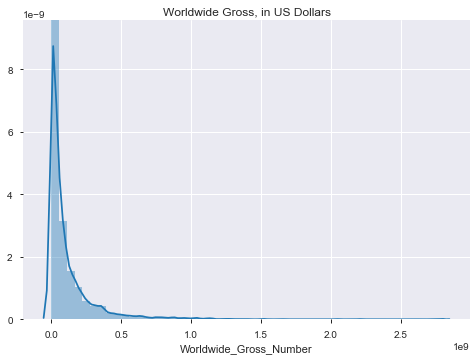

In [135]:
sns.distplot(box_office[target])
plt.title('Worldwide Gross, in US Dollars')

Text(0.5, 1.0, 'Worldwide Gross, in log-dollars')

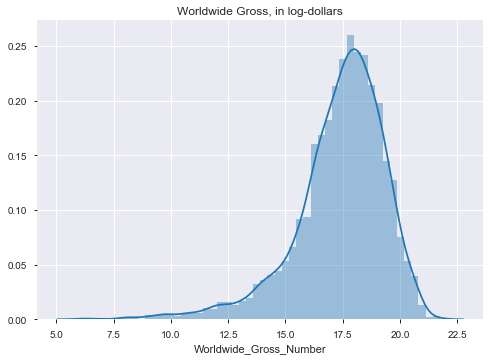

In [136]:
sns.distplot(y_log)
plt.title('Worldwide Gross, in log-dollars')

In [137]:
box_office['gross_log'] = y_log

In [138]:
box_office['release_year'] = box_office['Release_dt'].dt.year
box_office['release_month'] = box_office['Release_dt'].dt.month

In [139]:
# Train/Validate/Test split by year
train = box_office[box_office['Release_dt'].dt.year < 2009]
val = box_office[(box_office['Release_dt'].dt.year < 2014) & (box_office['Release_dt'].dt.year >= 2009)]
test = box_office[box_office['Release_dt'].dt.year >= 2014]

In [140]:
target = 'gross_log'

In [141]:
train.shape

(2354, 31)

In [142]:
val.shape

(792, 31)

In [143]:
test.shape

(766, 31)

In [144]:
2354 + 792 + 766
# My train/validate/test split appears to have worked!

3912

In [145]:
# Make averageRating categorical

In [146]:
# Mean worldwide gross in log-dollars
train[target].mean()

17.25923402478346

In [147]:
import math
from sklearn.metrics import mean_squared_error

# Baseline? What's my mean?
y_mean = train[target].mean()

# What's my mean squared error if I always guess the mean?
y_pred = pd.Series(y_mean for _ in range(len(val[target])))
mse = mean_squared_error(val[target], y_pred)

In [148]:
# Mean squared error for mean baseline = 4.55 log-dollars
mse

4.555124292593721

In [149]:
# Does this give me the MSE in dollars? Seems impossibly close...
np.expm1(mse)

94.11857703553248

In [155]:
X_train.head()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,release_year,release_month
12397,Airplane!,7.7,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1980-07-04,3500000,1980,7
12427,The Blue Lagoon,5.8,104.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1980-06-20,4500000,1980,6
12428,The Blues Brothers,7.9,133.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1980-06-20,27000000,1980,6
12440,Caddyshack,7.3,98.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1980-07-25,6000000,1980,7
12444,Can't Stop the Music,4.1,124.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1980-06-20,20000000,1980,6


In [156]:
X_train = train.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_train = train[target]
X_val = val.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_val = val[target]
X_test = test.drop(columns=[target, 'Worldwide_Gross_Number', 'Release_dt', 'primaryTitle'])
y_test = test[target]

In [157]:
y_train.head()

12397    18.239801
12427    17.685123
12428    17.862587
12440    17.500541
12444    14.508658
Name: gross_log, dtype: float64

# Fitting Logistic Regression model?

# Fitting xgboost Model

In [152]:
from xgboost import XGBRegressor

In [160]:
model = XGBRegressor(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

[23:20:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [165]:
y_pred = model.predict(X_val)
mean_squared_error(y_val, y_pred)

1.7927310383055173

In [ ]:
# MSE for XGBRegressor = 1.79 log-dollars